### Building Spark session and Importing datasets using Spark

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("SparkAssignment").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=4c6cdfaed6cac54b76ba6eeee80e58b73cdd057eaed1febe884d143e662f619a
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
# Import PySpark
import pyspark
from pyspark.sql import SparkSession

#Create SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()
sc=spark.sparkContext


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
from pyspark.sql.functions import col

In [ ]:
spark = SparkSession.builder \
    .appName("MovieRatingPrediction") \
    .getOrCreate()

In [ ]:
ratings_df = spark.read.csv("/content/ratings_small.csv", header=True, inferSchema=True)
movies_df = spark.read.csv("/content/movies.dat", header=True, inferSchema=True)

### Visualization of rating dataset

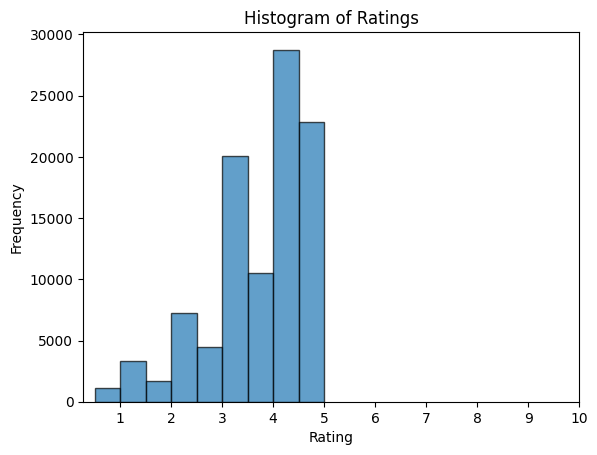

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/ratings_small.csv')
ratings = df['rating']

plt.hist(ratings, bins=9, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.xticks(range(1, 11))
plt.show()

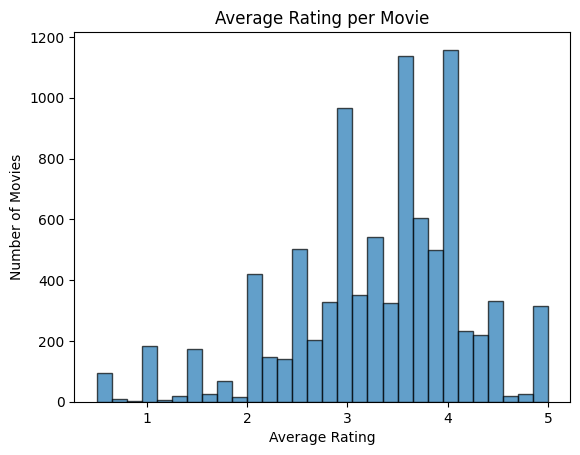

In [ ]:
average_ratings = df.groupby('movieId')['rating'].mean()

plt.hist(average_ratings, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.title('Average Rating per Movie')
plt.show()

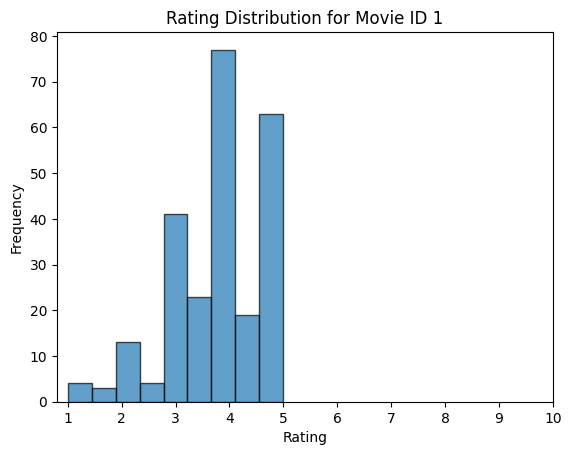

In [ ]:
# Assuming you want to visualize the ratings for movie with movie_id = 1
movie_ratings = df[df['movieId'] == 1]['rating']

plt.hist(movie_ratings, bins=9, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Movie ID 1')
plt.xticks(range(1, 11))
plt.show()

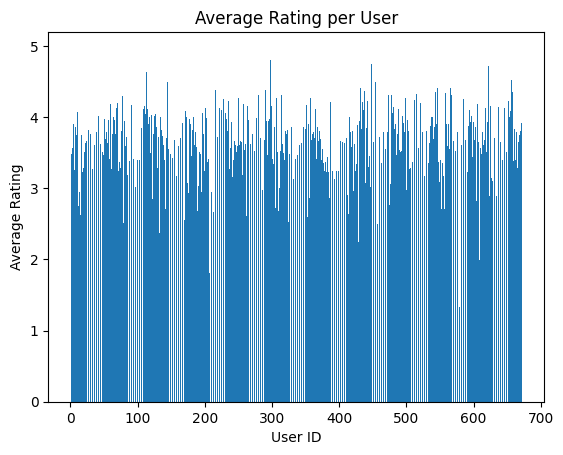

In [ ]:
import matplotlib.pyplot as plt

average_rating_per_user = df.groupby('userId')['rating'].mean()

plt.bar(average_rating_per_user.index, average_rating_per_user.values)
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.title('Average Rating per User')
plt.show()

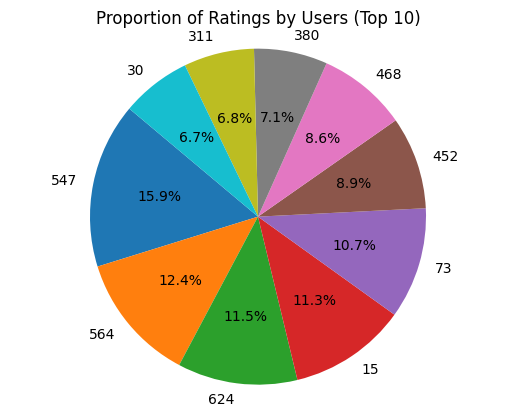

In [ ]:
import matplotlib.pyplot as plt

user_rating_counts = df['userId'].value_counts().head(10)  # Consider top 10 users for illustration

plt.pie(user_rating_counts, labels=user_rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Ratings by Users (Top 10)')
plt.show()

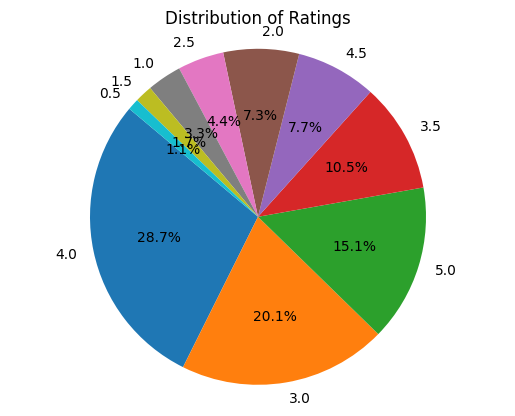

In [ ]:
import matplotlib.pyplot as plt

rating_distribution = df['rating'].value_counts()

plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ratings')
plt.show()

### Prediction Part using Spark

In [ ]:
als = ALS(
    rank=10,
    maxIter=10,
    regParam=0.01,
    userCol="userId",
    itemCol="movieId",
    ratingCol="rating",
)

model = als.fit(ratings_df)


In [ ]:
# Load your movie ratings dataset into a DataFrame
ratings_df = spark.read.csv("/content/ratings_small.csv", header=True, inferSchema=True)

# Split the data into training and testing sets
(training_data, test_data) = ratings_df.randomSplit([0.8, 0.2], seed=1234)


In [ ]:
predictions = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    metricName="rmse",
    labelCol="rating",
    predictionCol="prediction"
)

rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.5179018104295776


In [ ]:
user_id = 1
movie_id = 31
user_movie_df = spark.createDataFrame([(user_id, movie_id)], ["userId", "movieId"])
rating_prediction = model.transform(user_movie_df)
rating_prediction.show()

+------+-------+----------+
|userId|movieId|prediction|
+------+-------+----------+
|     1|     31| 2.3103075|
+------+-------+----------+



In [ ]:
from pyspark.sql.functions import col, lit  # Import lit function

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("TopRatedMovies") \
    .getOrCreate()

# Load your movie ratings dataset into a DataFrame
ratings_df = spark.read.csv("/content/ratings_small.csv", header=True, inferSchema=True)

average_ratings = ratings_df.groupBy("movieId").agg(avg(col("rating")).alias("avg_rating"))

top_rated_movies = average_ratings.orderBy("avg_rating", ascending=False)

# Show the top-rated movies
top_rated_movies.show(500)  # Change the number to display more or fewer top-rated movies

+-------+-----------------+
|movieId|       avg_rating|
+-------+-----------------+
|  32460|              5.0|
|  91690|              5.0|
|   5071|              5.0|
|  32525|              5.0|
|  61250|              5.0|
|   6598|              5.0|
|  65037|              5.0|
|     53|              5.0|
|    961|              5.0|
|   5427|              5.0|
|    876|              5.0|
|   4796|              5.0|
| 148881|              5.0|
|  26501|              5.0|
|   4088|              5.0|
| 107559|              5.0|
|  95313|              5.0|
|  32515|              5.0|
|    183|              5.0|
|   8123|              5.0|
|   6342|              5.0|
|  58649|              5.0|
|   2945|              5.0|
| 140763|              5.0|
|   2650|              5.0|
|   1771|              5.0|
|  41573|              5.0|
|  40226|              5.0|
| 140749|              5.0|
|  56869|              5.0|
|   5062|              5.0|
|   4617|              5.0|
|   4591|           

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import col, avg, row_number, lit

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("TopRatedMovies") \
    .getOrCreate()

# Load your movie ratings dataset into a DataFrame
ratings_df = spark.read.csv("/content/ratings_small.csv", header=True, inferSchema=True)

# Calculate the average rating for each movie
average_ratings = ratings_df.groupBy("movieId").agg(avg(col("rating")).alias("avg_rating"))

# Sort the movies by average rating in descending order and rank them
window_spec = Window.orderBy(col("avg_rating").desc())
ranked_movies = average_ratings.withColumn("rank", row_number().over(window_spec))

# Select the top 500 movies
top_500_movies = ranked_movies.filter(col("rank") <= 500)

# Calculate a group identifier for each movie in the top 500
top_500_movies_with_group = top_500_movies.withColumn("group_id", ((col("rank") - 1) / 100).cast("int"))

# Partition the top 500 movies into groups of 100 and select the top 2 from each group
window_spec_top_500 = Window.partitionBy(col("group_id")).orderBy(col("avg_rating").desc())
top_2_per_100_in_top_500 = top_500_movies_with_group.withColumn("rn", row_number().over(window_spec_top_500)).filter(col("rn") <= 2)

# Show the top 2 movies from every top 100 movies up to top 500 movies
top_2_per_100_in_top_500.show()


+-------+----------+----+--------+---+
|movieId|avg_rating|rank|group_id| rn|
+-------+----------+----+--------+---+
|  32460|       5.0|   1|       0|  1|
|  91690|       5.0|   2|       0|  2|
|    764|       5.0| 101|       1|  1|
|   1692|       5.0| 102|       1|  2|
|   6769|       5.0| 201|       2|  1|
|  32289|       5.0| 202|       2|  2|
| 140755|       5.0| 301|       3|  1|
|  55555|       5.0| 302|       3|  2|
|  26915|       4.5| 401|       4|  1|
|  26323|       4.5| 402|       4|  2|
+-------+----------+----+--------+---+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("TopRatedMovies") \
    .getOrCreate()

# Load your movie ratings dataset into a DataFrame
ratings_df = spark.read.csv("/content/ratings_small.csv", header=True, inferSchema=True)

# Assuming `model` is a trained ALS model
# Make predictions for all user-movie pairs
predictions = model.transform(ratings_df.select("userId", "movieId"))

# Select relevant columns and drop duplicates to get unique movie records
movie_data = ratings_df.select("movieId").dropDuplicates()

# Join with the predicted ratings to get movieId and predicted rating
predicted_ratings = movie_data.join(predictions, on="movieId", how="left")

# Sort the movies by predicted rating in descending order
top_predicted_movies = predicted_ratings.orderBy("prediction", ascending=False)

# Show the top-rated movies based on predicted ratings
top_predicted_movies.show()

+-------+------+----------+
|movieId|userId|prediction|
+-------+------+----------+
|   1221|   401|  6.024822|
|   1089|   332|  5.941136|
|   1693|   232|  5.891912|
|   1186|   564|  5.865974|
|   1711|   232| 5.8241816|
|   2959|   228|   5.78305|
|   1721|   128| 5.7750344|
|  36529|   473| 5.7688417|
|   1197|   228| 5.7568235|
|   3088|   466| 5.7389865|
|   4995|   586| 5.7273517|
|   2012|   546| 5.7126627|
|   7153|   432| 5.7029285|
|   1959|   564| 5.6987967|
|   2076|   545| 5.6960816|
|   1073|   112|  5.692076|
|    608|   530|   5.69184|
|    110|   232| 5.6836166|
|    296|   138| 5.6701083|
|   1954|     4|  5.653928|
+-------+------+----------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import expr

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("TopRatedMovies") \
    .getOrCreate()

# Load your movie ratings dataset into a DataFrame
ratings_df = spark.read.csv("/content/ratings_small.csv", header=True, inferSchema=True)

# Assuming `model` is a trained ALS model
# Make predictions for all user-movie pairs
predictions = model.transform(ratings_df.select("userId", "movieId"))

# Normalize predicted ratings to the range [0, 5]
normalized_predictions = predictions.withColumn("normalized_prediction", expr("CASE WHEN prediction > 5 THEN 5 WHEN prediction < 0 THEN 0 ELSE prediction END"))

# Select relevant columns and drop duplicates to get unique movie records
movie_data = ratings_df.select("movieId").dropDuplicates()

# Join with the normalized predicted ratings
normalized_predicted_ratings = movie_data.join(normalized_predictions, on="movieId", how="left")

# Sort the movies by normalized predicted rating in descending order
top_predicted_movies = normalized_predicted_ratings.orderBy("normalized_prediction", ascending=False)

# Show the top-rated movies based on normalized predicted ratings
top_predicted_movies.show(500)

+-------+------+----------+---------------------+
|movieId|userId|prediction|normalized_prediction|
+-------+------+----------+---------------------+
|   1961|     4| 5.2659335|                  5.0|
|   3200|   265|  5.009331|                  5.0|
|   3200|   564| 5.0589323|                  5.0|
|    471|   354| 5.5081377|                  5.0|
|  77291|   299|  5.026574|                  5.0|
|   2366|   594|  5.015943|                  5.0|
| 142240|   652| 5.0367293|                  5.0|
|   1238|   405| 5.0112705|                  5.0|
|   1291|   287|  5.084685|                  5.0|
|   1959|   564| 5.6987967|                  5.0|
|   1291|   448| 5.1110616|                  5.0|
|  32460|   298|  5.023057|                  5.0|
|   1291|   217|  5.199887|                  5.0|
|   1721|   245|  5.040614|                  5.0|
|   1721|   160| 5.0813537|                  5.0|
|  79132|   546|  5.421278|                  5.0|
|   1721|   418|  5.039666|                  5.0|
